# Proyecto FraudKeeper - Puesto Jr. Data Scientist

Cecilia Guillamet Chargue - Licenciada en Estadística

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importación de los datos

In [2]:
path = "/Users/ceciliaguillametchargue/Proyecto_FraudKeeper/insurance_exercise.csv"
df = pd.read_csv(path)

## Análisis descriptivo de los datos

Comenzamos el análisis visualizando el conjunto de datos:

In [3]:
pd.options.display.max_columns = 0  # permite observar todas las columnas del conjunto de datos.
df.head(10)

,days_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,10/12/2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,1/2/2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,6/4/2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,1/13/2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,2/3/1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2/27/2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,2/5/1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,1/30/2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,7/25/2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,1/5/2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


En las primeras 10 filas se puede observar que hay variables que cuentan con signos de interrogación y otras con datos faltantes.

Observemos ahora algunas estadísticas descriptivas de las columnas involucradas en la base de datos:

In [4]:
df.describe()

,days_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Se puede observar que:

- La variable _c39 no cuenta con ningún valor, por lo tanto se la puede eliminar.
    
- El resto de las variables numéricas no tiene datos faltantes.

Veamos ahora algunos valores descriptivos para las variables de tipo categóricas:

In [5]:
df.describe(include = object)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,3660 Andromedia Hwy,?,NO,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


La variable **"policy_number"**, **"incident_location"**, **"policy_bind_date"**, **"incident_date"** y **"insured_zip"** se eliminarán dado que cuentan con muchos valores distintos.

In [6]:
### Eliminación de variables

df.drop(['policy_number', 'insured_zip', '_c39', 'incident_location', 'policy_bind_date', 'incident_date'],
        axis = 1, inplace = True)

In [7]:
df.dtypes

days_as_customer                 int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

Observando los datos se identifica que la variable **"collision_type"** no siempre será utilizada dado que depende del tipo de incidente. Para observar esto con más detalle realizamos la siguiente tabla:

In [8]:
pd.crosstab(index = df['incident_type'],
        columns = df['collision_type'])

collision_type,?,Front Collision,Rear Collision,Side Collision
incident_type,,,,
Multi-vehicle Collision,0,115,152,152
Parked Car,84,0,0,0
Single Vehicle Collision,0,139,140,124
Vehicle Theft,94,0,0,0


Los signos ? ocurren dado que la variable **"collision_type"** no corresponde ser respondida.

In [9]:
### Reemplazamos los signos de interrogración

df['collision_type'].replace('?', 'not applicable', inplace = True)
df.replace('?', np.nan, inplace = True)

In [10]:
pd.set_option('max_rows', None)
df.isnull().sum()

days_as_customer                 0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      



Vemos ahora que **'property_damage'** y **'police_report_available'** presentan valores faltantes

Dado que la variable **'auto_model'** presenta muchos posibles valores distintos la recategorizamos según si el auto es de gama alta o media.

In [11]:
### Recategorización de 'auto_model'

df["auto_model"] = np.where(df["auto_model"] == "92x", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "E400", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RAM", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Tahoe", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RSX", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "95", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Pathfinder", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Camry", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "F150", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A3", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Highlander", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Neon", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "MDX", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Maxima", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Legacy", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "TL", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Impreza", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Forrestor", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Escape", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Corolla", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "3 series", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "C300", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Wrangler", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "M5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Civic", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Passat", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Silverado", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "CRV", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "93", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Accord", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X6", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Malibu", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Fusion", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Jetta", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "ML350", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Ultima", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Grand Cherokee", "Gama alta", df["auto_model"])

También procedemos a juntar las categorías de respuesta "wife" y "husband" de **"insured_relationship"** dado que responden al mismo estado civil.

In [12]:
### Juntamos categorías 'husband' y 'wife' dado que responden al mismo estado civil

df["insured_relationship"] = np.where(df["insured_relationship"] == 'husband', 'married', df["insured_relationship"])
df["insured_relationship"] = np.where(df["insured_relationship"] == 'wife', 'married', df["insured_relationship"])

In [13]:
df.head()

,days_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,married,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Gama alta,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,not applicable,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,Gama alta,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,Gama alta,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Gama media,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,not applicable,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,Gama media,2009,N


Ahora analizamos cuántas operaciones figuran como fraudulentas y cuántas como no fraudulentas.

In [14]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

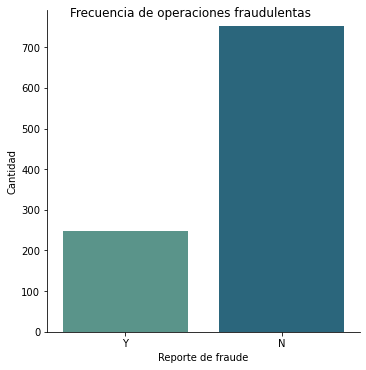

In [15]:
ax = sns.catplot(x = "fraud_reported", data = df, kind = "count", palette = "crest", legend = False)
ax.fig.suptitle("Frecuencia de operaciones fraudulentas")
ax.set(xlabel='Reporte de fraude', ylabel='Cantidad')

Vemos que los datos son desbalanceado. Esto lo debemos tener en cuenta al momento del análisis.

Analizamos los cruces entre las variables cuantitativas según si hubo fraude o no.

[Text(0.5, 0, 'Reclamo de la propiedad'),
 Text(0, 0.5, 'Prima anual de la póliza')]

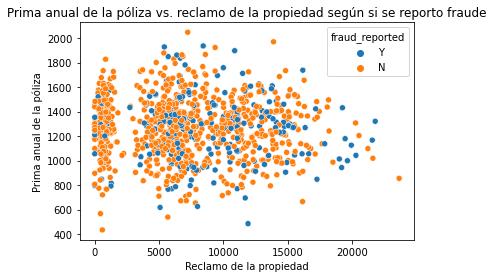

In [16]:
ax = sns.scatterplot(x = "property_claim", y = "policy_annual_premium", hue = "fraud_reported", data = df)
ax.set(title = "Prima anual de la póliza vs. reclamo de la propiedad según si se reporto fraude")
ax.set(xlabel='Reclamo de la propiedad', ylabel='Prima anual de la póliza')

[Text(0.5, 0, 'Total del reclamo'), Text(0, 0.5, 'Prima anual de la póliza')]

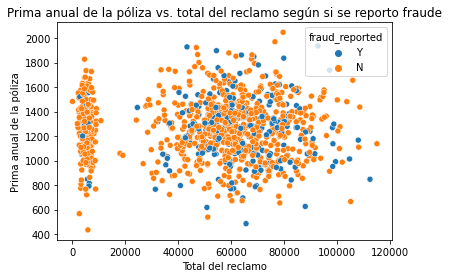

In [17]:
ax = sns.scatterplot(x = "total_claim_amount", y = "policy_annual_premium", hue = "fraud_reported", data = df)
ax.set(title = "Prima anual de la póliza vs. total del reclamo según si se reporto fraude")
ax.set(xlabel='Total del reclamo', ylabel='Prima anual de la póliza')

[Text(0.5, 0, 'Porcentaje'), Text(0, 0.5, 'Ocupación del asegurado')]

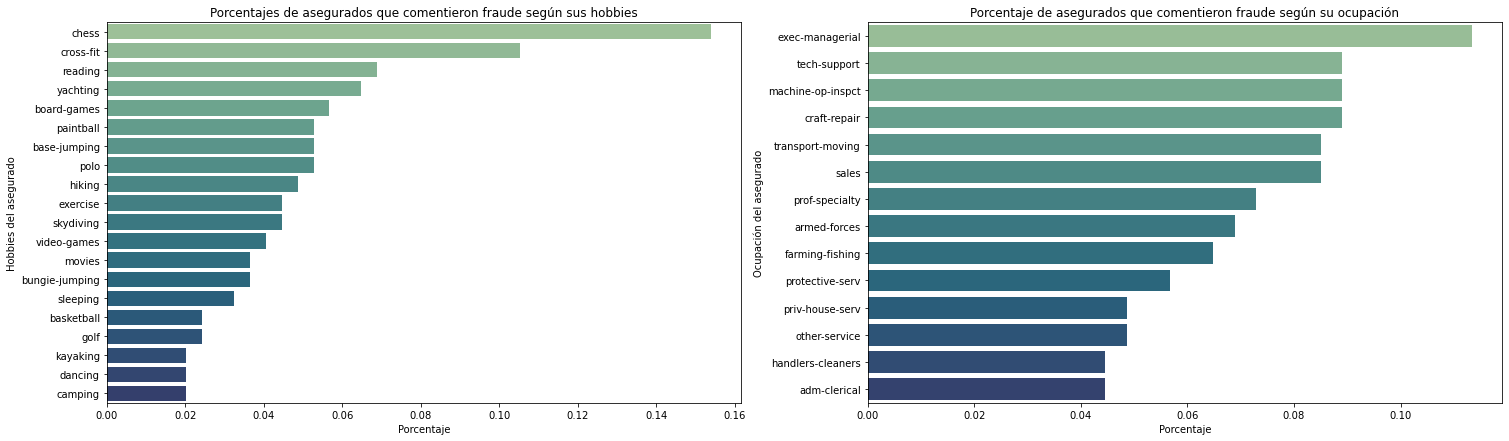

In [18]:
fig , axes = plt.subplots(1, 2, figsize = (25,7))

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("insured_hobbies", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["insured_hobbies", "porcentajes"]
ax = sns.barplot(ax = axes[0], data = fraud_hobbies, x = "porcentajes",  y = "insured_hobbies", palette = "crest")
ax.set(title = "Porcentajes de asegurados que comentieron fraude según sus hobbies")
ax.set(xlabel='Porcentaje', ylabel='Hobbies del asegurado')

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("insured_occupation", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["insured_occupation", "porcentajes"]
ax = sns.barplot(ax = axes[1], data = fraud_hobbies, x = "porcentajes",  y = "insured_occupation", palette = "crest")
ax.set(title = "Porcentaje de asegurados que comentieron fraude según su ocupación")
ax.set(xlabel='Porcentaje', ylabel='Ocupación del asegurado')

[Text(0.5, 0, 'Porcentaje'), Text(0, 0.5, 'Estado')]

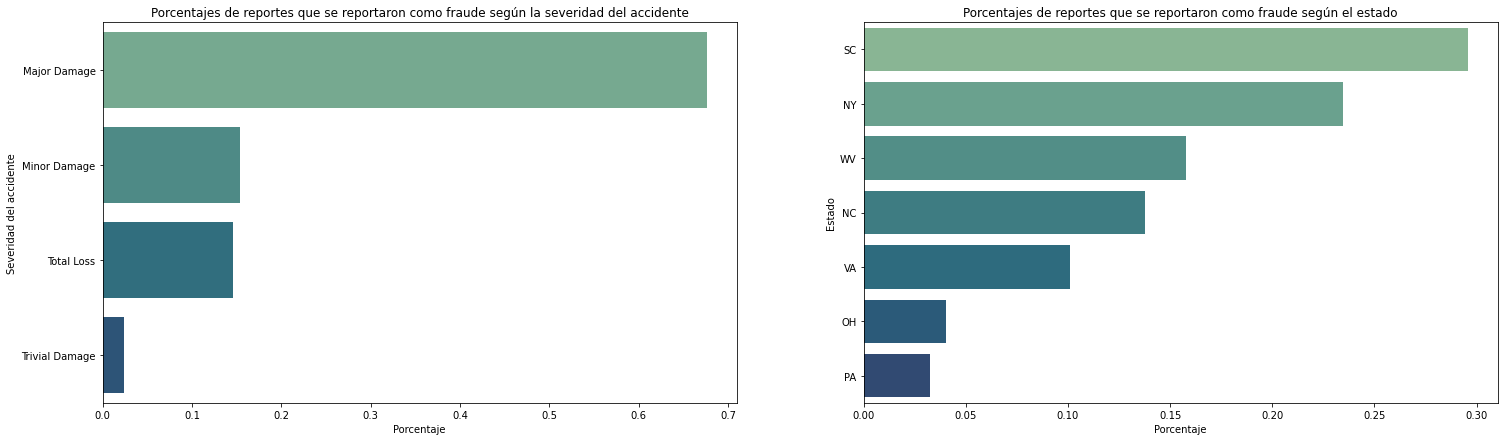

In [19]:
fig , axes = plt.subplots(1, 2, figsize = (25,7))

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("incident_severity", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["incident_severity", "porcentajes"]
ax = sns.barplot(ax = axes[0], data = fraud_hobbies, x = "porcentajes",  y = "incident_severity", palette = "crest")
ax.set(title = "Porcentajes de reportes que se reportaron como fraude según la severidad del accidente")
ax.set(xlabel='Porcentaje', ylabel='Severidad del accidente')

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("incident_state", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["incident_state", "porcentajes"]
ax = sns.barplot(ax = axes[1], data = fraud_hobbies, x = "porcentajes",  y = "incident_state", palette = "crest")
ax.set(title = "Porcentajes de reportes que se reportaron como fraude según el estado")
ax.set(xlabel='Porcentaje', ylabel='Estado')

Analizando las variables con valores faltantes, como las mismas contaban con más de un 30% de NAs y, a su vez, no parecen inluir en la variable respuesta, se decido no tenerlas en cuenta en el modelo.

Por otro lado, el fabricanto del auto (**"auto_make"**) se descarta también dado que cuenta con muchas posibilidades de respuesta y no se ve una fuerte relación con la variable respuesta.

In [20]:
df.drop(["police_report_available", "property_damage", "auto_make"], axis = 1, inplace = True)

### Creación de variable dummies

Primero categorizamos la variable respuesta como 1 aquellos registros que fueron fraude y 0 a los que no.

In [21]:
df["fraud_reported"] = np.where(df["fraud_reported"] == 'Y', 1, df["fraud_reported"])
df["fraud_reported"] = np.where(df["fraud_reported"] == 'N', 0, df["fraud_reported"])
df["fraud_reported"] = df["fraud_reported"].astype(int) # convertimos la variable en numérica.

Creamos las variables dummies para el resto de las variables categóricas:

In [22]:
### Creación de las variables dummies para las variable de tipo categóricas

for i in df.columns:
    if df[i].dtypes == 'object':
        dummies = pd.get_dummies(df[i], prefix = i+'_')
        df = pd.concat([df,dummies], axis = 1)
        df.drop([i], axis = 1, inplace = True)

df.head()

,days_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state__IL,policy_state__IN,policy_state__OH,policy_csl__100/300,policy_csl__250/500,policy_csl__500/1000,insured_sex__FEMALE,insured_sex__MALE,insured_education_level__Associate,insured_education_level__College,insured_education_level__High School,insured_education_level__JD,insured_education_level__MD,insured_education_level__Masters,insured_education_level__PhD,insured_occupation__adm-clerical,insured_occupation__armed-forces,insured_occupation__craft-repair,insured_occupation__exec-managerial,insured_occupation__farming-fishing,insured_occupation__handlers-cleaners,insured_occupation__machine-op-inspct,insured_occupation__other-service,...,insured_hobbies__yachting,insured_relationship__married,insured_relationship__not-in-family,insured_relationship__other-relative,insured_relationship__own-child,insured_relationship__unmarried,incident_type__Multi-vehicle Collision,incident_type__Parked Car,incident_type__Single Vehicle Collision,incident_type__Vehicle Theft,collision_type__Front Collision,collision_type__Rear Collision,collision_type__Side Collision,collision_type__not applicable,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,incident_severity__Trivial Damage,authorities_contacted__Ambulance,authorities_contacted__Fire,authorities_contacted__None,authorities_contacted__Other,authorities_contacted__Police,incident_state__NC,incident_state__NY,incident_state__OH,incident_state__PA,incident_state__SC,incident_state__VA,incident_state__WV,incident_city__Arlington,incident_city__Columbus,incident_city__Hillsdale,incident_city__Northbend,incident_city__Northbrook,incident_city__Riverwood,incident_city__Springfield,auto_model__3 Series,auto_model__Gama alta,auto_model__Gama media
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Finalmente creamos el data frame con las variables que serán utilizadas como predictoras:

In [23]:
X = df.drop(["fraud_reported"], axis = 1)
X.head()

,days_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state__IL,policy_state__IN,policy_state__OH,policy_csl__100/300,policy_csl__250/500,policy_csl__500/1000,insured_sex__FEMALE,insured_sex__MALE,insured_education_level__Associate,insured_education_level__College,insured_education_level__High School,insured_education_level__JD,insured_education_level__MD,insured_education_level__Masters,insured_education_level__PhD,insured_occupation__adm-clerical,insured_occupation__armed-forces,insured_occupation__craft-repair,insured_occupation__exec-managerial,insured_occupation__farming-fishing,insured_occupation__handlers-cleaners,insured_occupation__machine-op-inspct,insured_occupation__other-service,insured_occupation__priv-house-serv,...,insured_hobbies__yachting,insured_relationship__married,insured_relationship__not-in-family,insured_relationship__other-relative,insured_relationship__own-child,insured_relationship__unmarried,incident_type__Multi-vehicle Collision,incident_type__Parked Car,incident_type__Single Vehicle Collision,incident_type__Vehicle Theft,collision_type__Front Collision,collision_type__Rear Collision,collision_type__Side Collision,collision_type__not applicable,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,incident_severity__Trivial Damage,authorities_contacted__Ambulance,authorities_contacted__Fire,authorities_contacted__None,authorities_contacted__Other,authorities_contacted__Police,incident_state__NC,incident_state__NY,incident_state__OH,incident_state__PA,incident_state__SC,incident_state__VA,incident_state__WV,incident_city__Arlington,incident_city__Columbus,incident_city__Hillsdale,incident_city__Northbend,incident_city__Northbrook,incident_city__Riverwood,incident_city__Springfield,auto_model__3 Series,auto_model__Gama alta,auto_model__Gama media
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Luego creamos el data frame con la variable utilizada como target o variable respuesta:

In [24]:
Y = df["fraud_reported"]
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

Ahora normalizamos las variables cuantitativas dado que entre ellas tienen diferentes rangos de valores posibles:

In [25]:
### NORMALIZACION DE LAS VARIABLES

from sklearn import preprocessing

X_cuanti = X[["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]]
X_dummies = [v for v in X if v not in X_cuanti]
X = df[X_dummies]

X_norm = pd.DataFrame(preprocessing.StandardScaler().fit(X_cuanti).transform(X_cuanti))
X_norm.columns = ["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]
X = pd.concat([X_norm, X], axis = 1)
X.head()

,days_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state__IL,policy_state__IN,policy_state__OH,policy_csl__100/300,policy_csl__250/500,policy_csl__500/1000,insured_sex__FEMALE,insured_sex__MALE,insured_education_level__Associate,insured_education_level__College,insured_education_level__High School,insured_education_level__JD,insured_education_level__MD,insured_education_level__Masters,insured_education_level__PhD,insured_occupation__adm-clerical,insured_occupation__armed-forces,insured_occupation__craft-repair,insured_occupation__exec-managerial,insured_occupation__farming-fishing,insured_occupation__handlers-cleaners,insured_occupation__machine-op-inspct,insured_occupation__other-service,insured_occupation__priv-house-serv,...,insured_hobbies__yachting,insured_relationship__married,insured_relationship__not-in-family,insured_relationship__other-relative,insured_relationship__own-child,insured_relationship__unmarried,incident_type__Multi-vehicle Collision,incident_type__Parked Car,incident_type__Single Vehicle Collision,incident_type__Vehicle Theft,collision_type__Front Collision,collision_type__Rear Collision,collision_type__Side Collision,collision_type__not applicable,incident_severity__Major Damage,incident_severity__Minor Damage,incident_severity__Total Loss,incident_severity__Trivial Damage,authorities_contacted__Ambulance,authorities_contacted__Fire,authorities_contacted__None,authorities_contacted__Other,authorities_contacted__Police,incident_state__NC,incident_state__NY,incident_state__OH,incident_state__PA,incident_state__SC,incident_state__VA,incident_state__WV,incident_city__Arlington,incident_city__Columbus,incident_city__Hillsdale,incident_city__Northbend,incident_city__Northbrook,incident_city__Riverwood,incident_city__Springfield,auto_model__3 Series,auto_model__Gama alta,auto_model__Gama media
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.183440,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0.315491,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,1.479664,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,0.648112,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Con el fin de generar un modelo de detección de fraudes propongo la realización de dos modelos. Por un lado, un modelo de regresión logística y, por otro lado, un árbol de decisión.

# Modelo de regresión logística

In [26]:
from sklearn import datasets
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
lr = LogisticRegression()

X_vars = X.columns.values.tolist()

Aplicando un selector automático de las variables a incluir:

In [28]:
rfe = RFECV(lr)
rfe = rfe.fit(X, Y.values.ravel())

In [29]:
z=zip(X_vars, rfe.support_, rfe.ranking_)

In [30]:
z = pd.DataFrame(z)
z.columns = ["Variable", "Bool", "Ranking"]
z = z.sort_values("Ranking")
z.head(10)

,Variable,Bool,Ranking
51,insured_hobbies__cross-fit,True,1
49,insured_hobbies__camping,True,1
50,insured_hobbies__chess,True,1
78,incident_severity__Major Damage,True,1
64,insured_hobbies__yachting,False,2
62,insured_hobbies__sleeping,False,3
36,insured_occupation__handlers-cleaners,False,4
81,incident_severity__Trivial Damage,False,5
79,incident_severity__Minor Damage,False,6
80,incident_severity__Total Loss,False,7


Creamos una lista con las variables que se consideran significativas para el análisis:

In [31]:
### Selección de las variables que se consideran significativas para el análisis

cols = ["insured_hobbies__chess", "insured_hobbies__cross-fit", "insured_hobbies__camping",
        "incident_severity__Major Damage"]

X_rl = X[cols]

Separamos el conjunto de datos en conjunto de entrenamiento y conjunto de prueba:

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, Y_train, Y_test = train_test_split(X_rl,Y, test_size = 0.15, random_state=1234)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (850, 4) (850,)
Test set: (150, 4) (150,)


In [33]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

0.8411764705882353

In [34]:
probs = lm.predict_proba(X_test)

In [35]:
prediction = lm.predict(X_test)

Aplicando el método de validación cruzada se obtiene:

In [36]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linear_model.LogisticRegression(), X_train, Y_train, scoring="accuracy", cv=10)
print('Los valores de los scores son: ', score)
print('La media de los scores es: ', score.mean())

Los valores de los scores son:  [0.82352941 0.85882353 0.90588235 0.84705882 0.84705882 0.77647059
 0.82352941 0.89411765 0.81176471 0.82352941]
La media de los scores es:  0.8411764705882353


In [37]:
probs = lm.predict_proba(X_test)

In [38]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.073618,0,0
1,0.073618,0,0
2,0.541851,1,1
3,0.073618,0,0
4,0.073618,0,0


In [39]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual,0,1
prediction,,
0,89,2
1,13,46


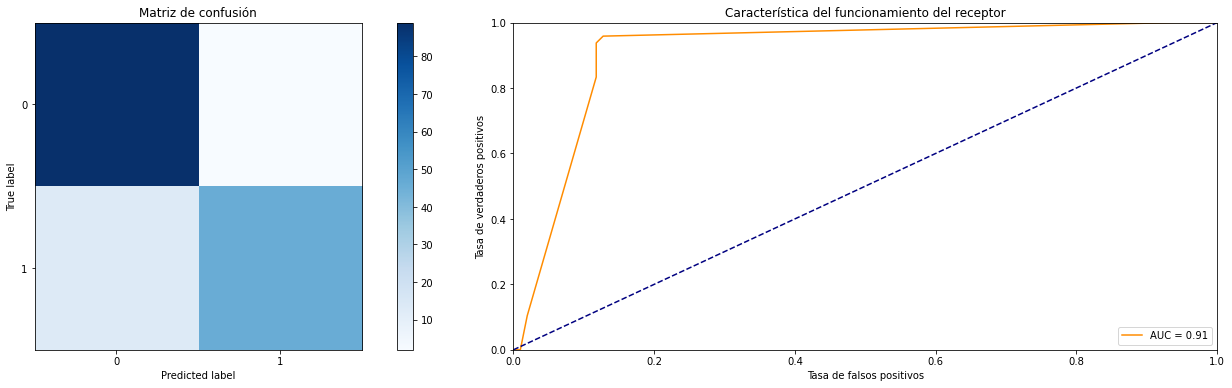

In [40]:
### MATRIZ DE CONFUSIÓN

plt.figure(figsize=(20,10))

confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

from sklearn.metrics import plot_confusion_matrix

plt.subplot(221)
plt.imshow(confusion_matrix , interpolation='nearest', cmap = plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
plt.xticks([0,1], rotation=0)
plt.yticks([0,1], rotation=0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


### CURVA ROC

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, prob)
roc_auc = metrics.auc(fpr, tpr)


### Gráfico

import matplotlib.pyplot as plt

plt.subplot(222)
plt.title('Característica del funcionamiento del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color = "darkorange")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'navy')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

Analizando lo obtenido a través del modelo de regresión logística, se puede determinar que las variables **"insured_hobbies__chess"**, **"insured_hobbies__cross-fit"**, **"insured_hobbies__camping"** y **"incident_severity__Major Damage"** son las que mayor determinan que la operación sea registrada como fraudulenta. 

La precisión del modelo resulta ser de 0,8412, el cual es un valor bueno de precisión. Analizando la matriz de confusión es posible observar que solo 2 operaciones fueron fraudulentas, pero el modelo las determinó como no fraudulentas, y 13 fueron clasificadas como fraudulentas cuando en realidad no lo fueron.

# Árbol de decisión para clasificación

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

from numpy import sqrt
from numpy import argmin

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from graphviz import Digraph

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1234)

Vamos a analizar qué profundidad es la más adecuada:

In [43]:
for i in range(1,20):
    Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = i, min_samples_split = 5, random_state = 1234)
    Tree.fit(X_train, Y_train)
    CV = KFold(n_splits = 10, shuffle = True, random_state = 1)
    scores = cross_val_score(Tree, X_train, Y_train, scoring = "accuracy", cv = CV, n_jobs = 1)
    score=np.mean(scores)
    print("Score para i = ", i, " es de ", score)

Score para i =  1  es de  0.8058823529411765
Score para i =  2  es de  0.8305882352941177
Score para i =  3  es de  0.8305882352941175
Score para i =  4  es de  0.8388235294117645
Score para i =  5  es de  0.8188235294117646
Score para i =  6  es de  0.8188235294117646
Score para i =  7  es de  0.8235294117647058
Score para i =  8  es de  0.8211764705882352
Score para i =  9  es de  0.8117647058823529
Score para i =  10  es de  0.7941176470588236
Score para i =  11  es de  0.7835294117647058
Score para i =  12  es de  0.7835294117647059
Score para i =  13  es de  0.7847058823529411
Score para i =  14  es de  0.7741176470588235
Score para i =  15  es de  0.776470588235294
Score para i =  16  es de  0.7670588235294117
Score para i =  17  es de  0.7799999999999999
Score para i =  18  es de  0.7776470588235294
Score para i =  19  es de  0.7776470588235294


Dado que el score más alto encontrado (0,8388) ocurre en una profundidad de 4, optamos por continuar con este valor:

In [44]:
Tree = DecisionTreeClassifier(criterion="entropy", min_samples_split = 20, min_samples_leaf = 5, max_depth = 4, class_weight = "balanced")
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5, min_samples_split=20)

In [45]:
Tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5, min_samples_split=20)

In [46]:
predTree = Tree.predict(X_test)

In [47]:
probs = Tree.predict_proba(X_test)
probs[:,1]

array([0.02162575, 0.1704599 , 0.86296417, 0.02162575, 0.1704599 ,
       0.74955819, 0.1704599 , 0.86296417, 1.        , 0.02162575,
       0.1704599 , 0.49530814, 0.86296417, 0.74955819, 0.8548293 ,
       0.1704599 , 0.1704599 , 0.02162575, 0.49530814, 0.1704599 ,
       0.02162575, 0.1704599 , 0.74955819, 0.1704599 , 0.74955819,
       0.02162575, 0.02162575, 0.1704599 , 0.02162575, 0.1704599 ,
       0.86296417, 0.86296417, 0.1704599 , 0.1704599 , 0.02162575,
       0.1704599 , 0.1704599 , 0.02162575, 0.1704599 , 0.1704599 ,
       0.74955819, 0.74955819, 0.86296417, 0.86296417, 1.        ,
       0.1704599 , 0.86296417, 0.8548293 , 1.        , 1.        ,
       0.1704599 , 0.1704599 , 0.02162575, 0.8548293 , 0.86296417,
       0.1704599 , 0.1704599 , 0.86296417, 0.1704599 , 1.        ,
       0.1704599 , 0.1704599 , 0.1704599 , 0.02162575, 0.1704599 ,
       0.1704599 , 0.86296417, 0.86296417, 0.86296417, 0.1704599 ,
       0.1704599 , 0.02162575, 0.1704599 , 0.86296417, 0.17045

In [48]:
Y_test[:5]

681    0
990    0
155    1
768    0
438    0
Name: fraud_reported, dtype: int64

In [49]:
Tree.score(X_train, Y_train)

0.8541176470588235

In [50]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

DecisionTrees's Accuracy:  0.9


### Visualización del árbol de decisión

In [51]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from graphviz import Digraph

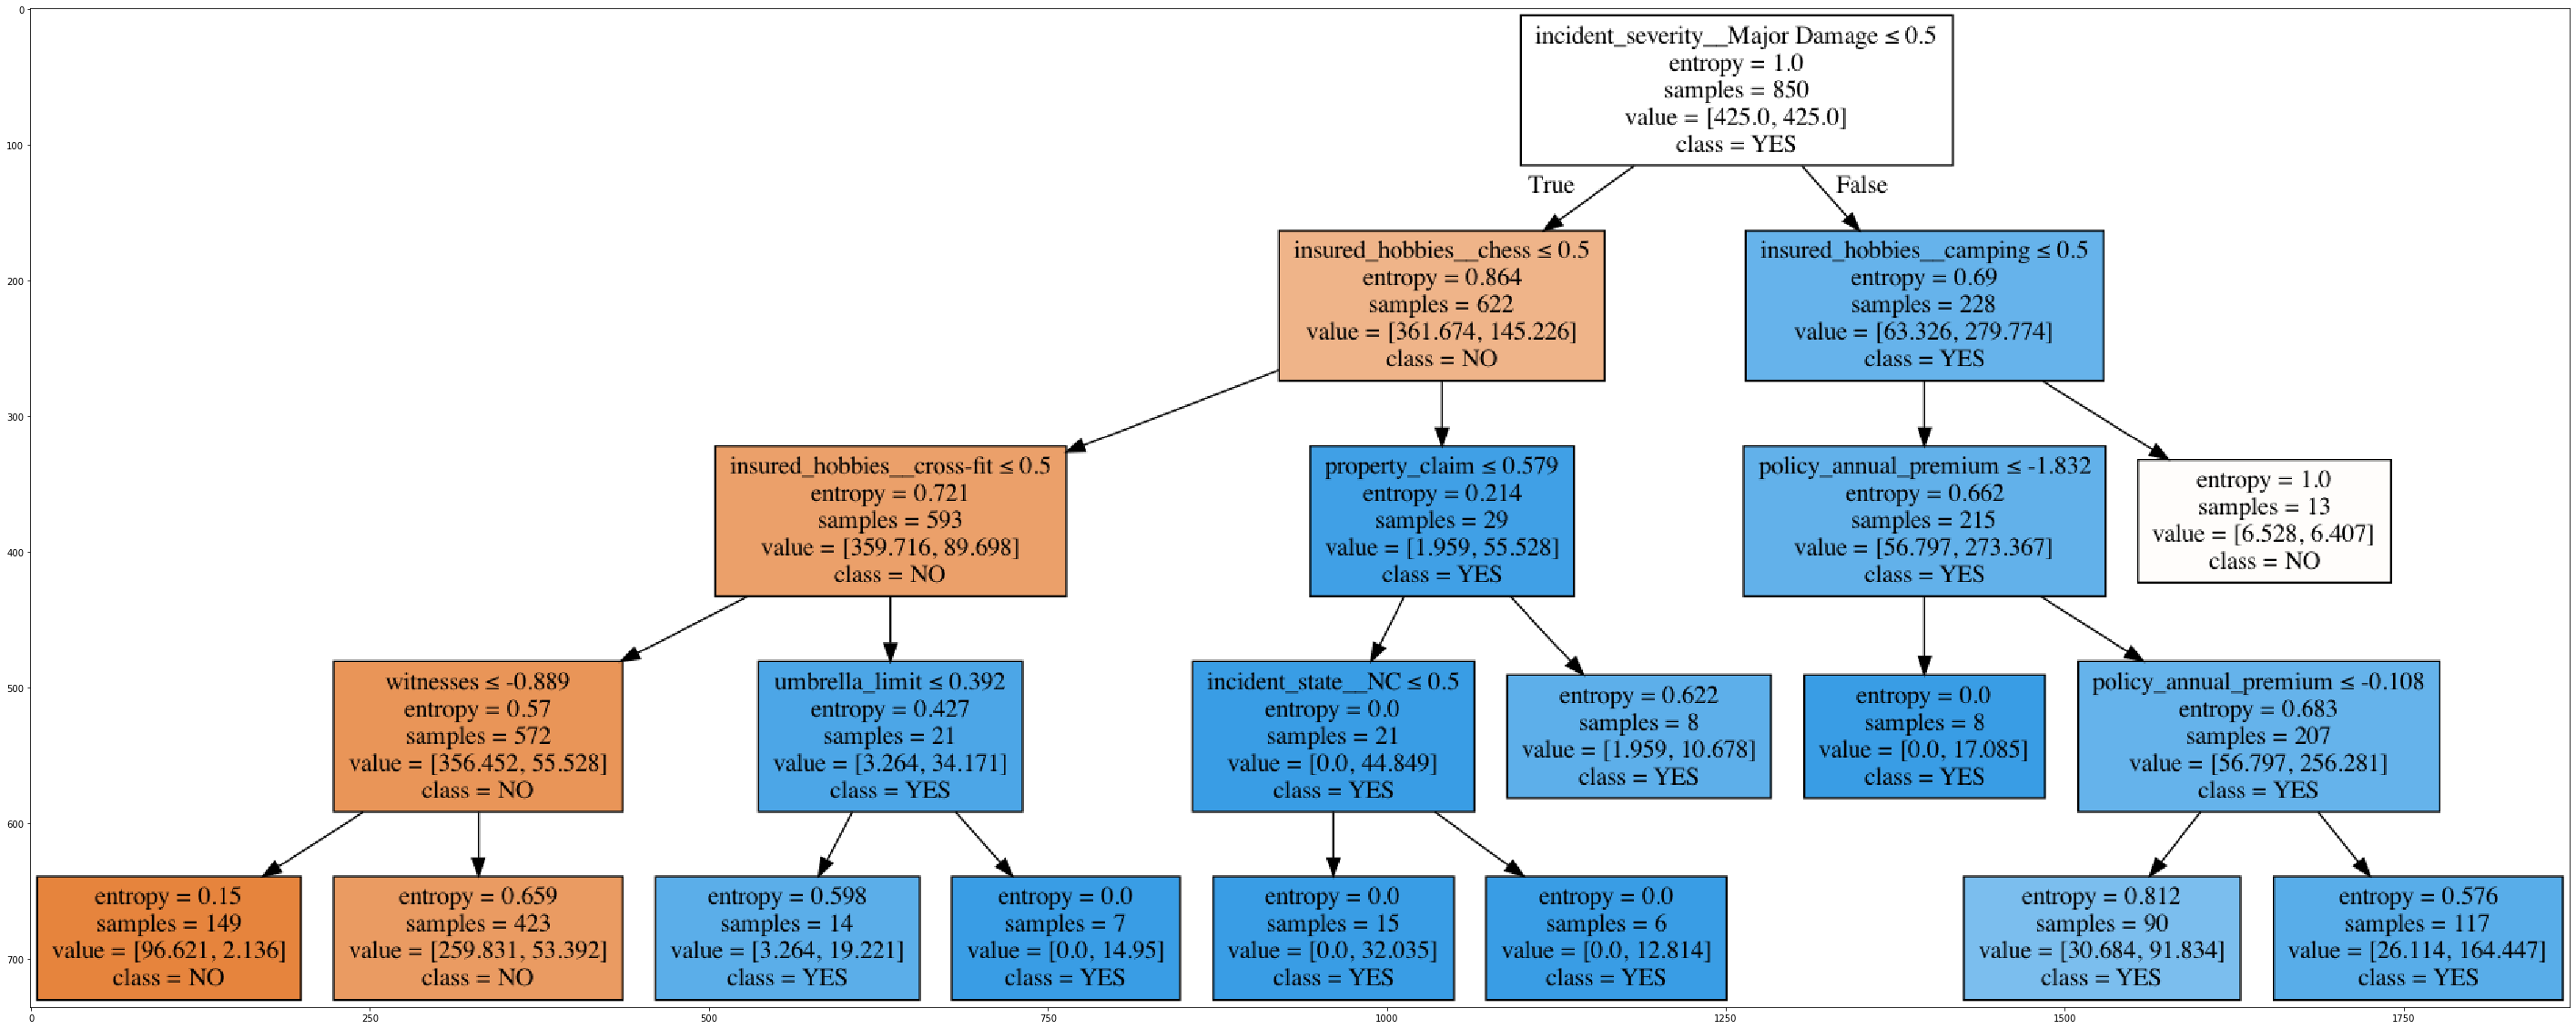

In [52]:
target = [str(x) for x in Y_train]

dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns
out = tree.export_graphviz(Tree, feature_names = featureNames, out_file = dot_data, class_names = { 0: "NO", 1: "YES"}, 
                         filled = True,  special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (50, 50))
plt.imshow(img, interpolation = 'nearest')

In [53]:
confusion_matrix = pd.crosstab(predTree, Y_test)
confusion_matrix

fraud_reported,0,1
row_0,,
0,90,3
1,12,45


El major umbral=0.749558, G-Mean=0.133


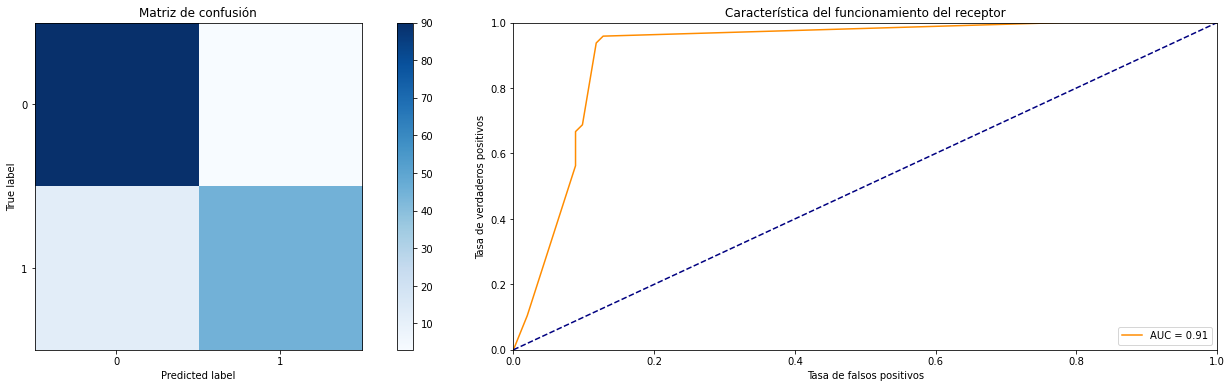

In [54]:
### MATRIZ DE CONFUSIÓN

plt.figure(figsize=(20,10))

confusion_matrix = pd.crosstab(predTree, Y_test)


plt.subplot(221)
plt.imshow(confusion_matrix , interpolation='nearest', cmap = plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
plt.xticks([0,1], rotation=0)
plt.yticks([0,1], rotation=0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


### CURVA ROC

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, probs[:,1])
# cálculo de la media geométrica  calculate the g-mean for each threshold
gmeans = sqrt((1-tpr)**2 + (fpr)**2)
# localiza el index del mayor valor de la media geométrica
ix = argmin(gmeans)
print('El major umbral=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

roc_auc = metrics.auc(fpr, tpr)

### Gráfico

import matplotlib.pyplot as plt

plt.subplot(222)
plt.title('Característica del funcionamiento del receptor')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color = "darkorange")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color = 'navy')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

En base al gráfico de nuestro árbol de decisión vemos que el nodo raíz hace una primera división de acuerdo a si el accidente hubo daños mayores, con salida hacia la derecha, y si no hubo daños mayores, con calida para el lado izquierdo.

En el segundo nivel las variables involucradas son si el asegurado jugaba al ajedrez o si el hobby era salir de camping. En los siguientes niveles, se tienen en cuenta si el asegurado realizaba cross-fit, el reclamo de propiedad, la poliza anual, la presencia de testigos y la variable umbrella_limit.

Este modelo presenta una precisión muy buena de 0,9. En la matriz de confusión es posible observar que se presentan 12 valores falsos positivos, mientra que solo 3 falsos negativos.

El área bajo la curva ROC es de 0,91, lo cual nos indica también que el modelo es bueno para determinar si los registros fueron o no fraudulentos.

# Consideraciones

-   Respecto de las variables **"property_damage"** y **"police_report_available"**, que fueron las variables que presentaron los valores faltantes, se optó por eliminar las mismas dado que más del 30% de los valores no estaban presentes. A su vez, habiendo revisado las proporciones de las categorías de respueta de estas variables respecto de si esa operación fue o no fraudulenta, las mismas eran muy similares, por lo cual si reemplazaba por esos valores, al haber tantos valores faltantes, podría influenciar a la respuesta.

    Tal ves, un método de imputación que se podría haber utilizado es una imputación por el vecino más cercano.

-   Investigando he encontrado que buenos modelos de detección de fraude son los **Modelos de Detección de Anomalías** pero desconozco el desarrollo de los mismos, por lo cual opté por aplicar técnicas que conozco.

-   En un anexo presento todos los gráficos realizados, habiendo dejado solo en el análisis los que consederé de mayor importancia.

# Anexos

In [57]:
g = sns.PairGrid(df, hue = 'fraud_reported')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff3075b24c0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
sns.boxplot(ax = axes[0], x = "fraud_reported", y = "umbrella_limit", data = df, palette = "crest")
sns.boxplot(ax = axes[1], x = "fraud_reported", y = "capital-gains", data = df, palette = "crest")
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "capital-loss", data = df, palette = "crest")

In [ ]:
sns.boxplot(x = "fraud_reported", y = "total_claim_amount", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
sns.boxplot(ax = axes[0], x = "fraud_reported", y = "injury_claim", data = df, palette = "crest")
sns.boxplot(ax = axes[1], x = "fraud_reported", y = "property_claim", data = df, palette = "crest")
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "vehicle_claim", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "insured_sex", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "policy_state", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "policy_deductable", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "insured_education_level", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "insured_relationship", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "incident_type", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "collision_type", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "authorities_contacted", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "incident_state", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "incident_city", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "property_damage", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "bodily_injuries", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "witnesses", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "police_report_available", data = df, palette = "crest")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,7))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "auto_make", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "auto_year", hue = "fraud_reported", data = df, palette = "crest")